# Bike Sharing Assignment

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

##### Business Goal:

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.       
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Importing Libraries

In [1]:
# Importing the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset and Understanding Data

In [2]:
# Read the csv file using pandas
bike = pd.read_csv('day.csv')
# Inspect first few rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Get basic idea of data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# Check dataframe for null,number of columns,number of rows and datatype
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [5]:
# Dropping features that are not useful for our model
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

1. From the given data, instant is an index column so drop it.
2. Column dteday, yr, month are having same data so we can drop dteday to avoid confusion.
3. casual + registered = cnt. cnt is our target variable so we are dropping casual and registered.

In [6]:
# Checking dataframe after dropping features
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
# Checking for null values
bike.isnull().sum()*100/bike.shape[0]

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

There are no null values.

# Visualising the Data

<AxesSubplot:ylabel='cnt'>

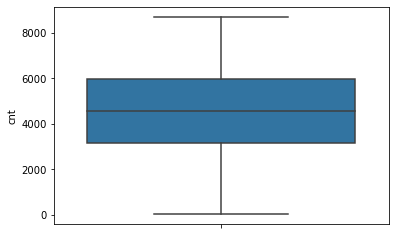

In [8]:
# Analysing target variable
sns.boxplot(y='cnt',data=bike)

There is no outliers present in target variable.

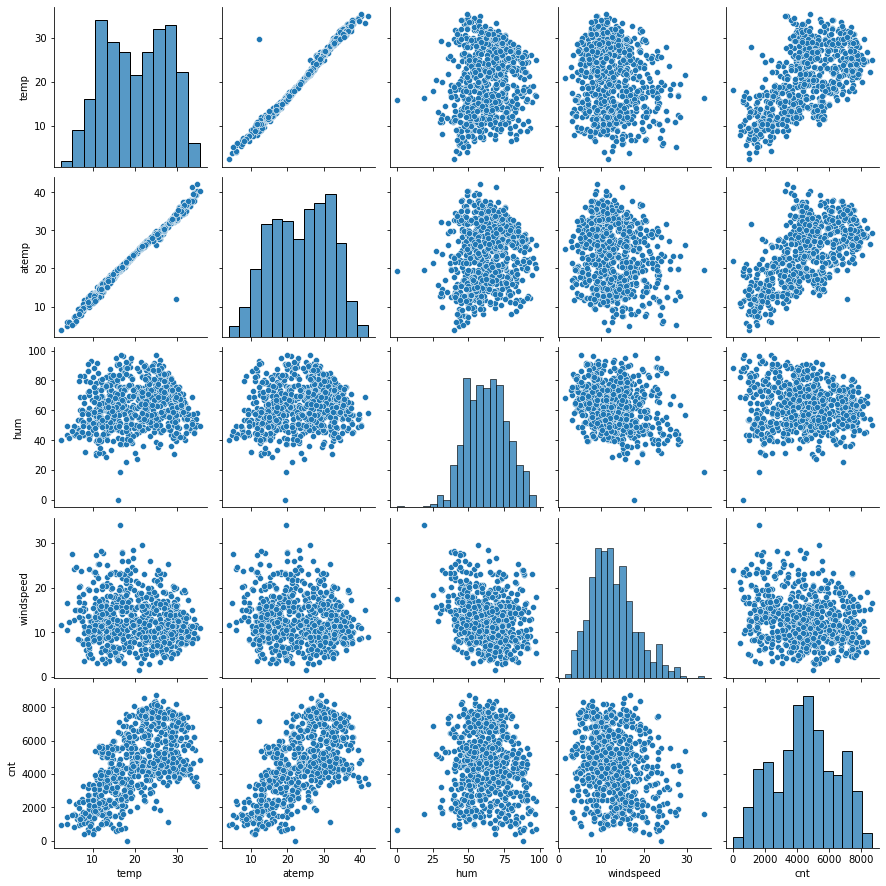

In [9]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

temp and atemp has the highest corelation with each other

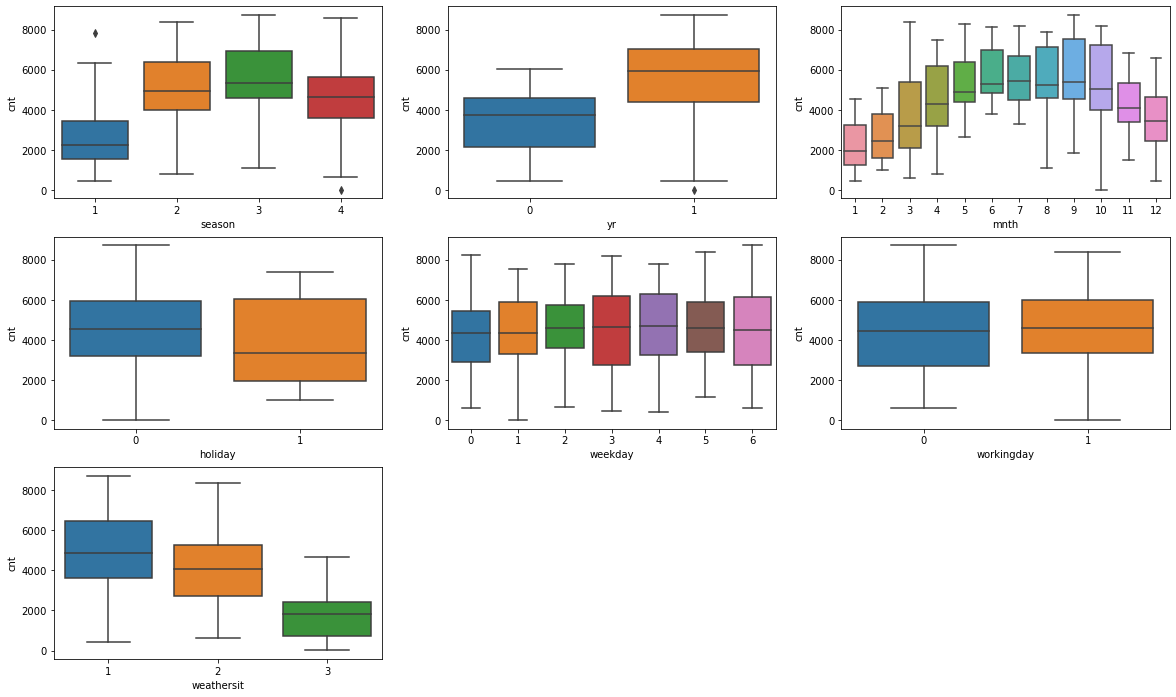

In [10]:
# Visualising categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

1. Season 3 - fall has highest demand for rental bikes.
2. More bikes are rent during 2019 when compared with 2018.
3. Demand of bike is similar throughout the weekdays.
4. Demand has decreased for holidays.
5. No significant change in working and non working days.
6. Weathersit 1 (Few clouds) has highest demand.
7. During September, bike renting is more. During the year end and beginning, it is less.


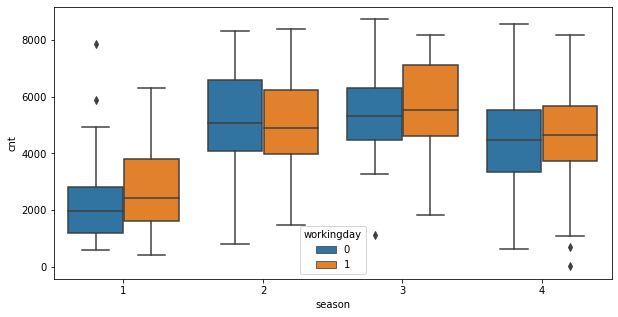

In [11]:
# Creating baxplot for season and workingday
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

On working day demand is high than holiday in all season except seaason 2

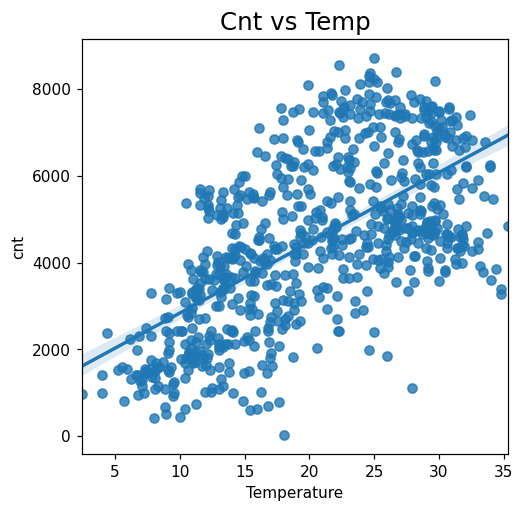

In [12]:
# Creating regplot for temp and cnt
plt.figure(figsize=(5,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Visualization confirms the positive correlation between temp and cnt.

<AxesSubplot:>

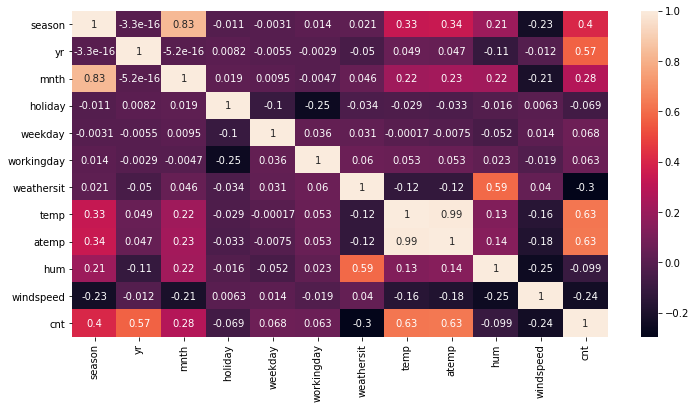

In [13]:
# Finding correlation 
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot = True)

1. Temp and Atemp are highly correlated and also have high correlation with cnt variable.
2. Month and season has high correlation.
3. Year also have high correlation with cnt variable.
4. Weathersit and humidity has high correlation.

## Data Preparation 

### Creating dummy variables 

In [14]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_bike = pd.get_dummies(bike.mnth,drop_first=True).rename(columns=lambda x:'month' +str(x))
weekdays_bike = pd.get_dummies(bike.weekday,drop_first=True).rename(columns=lambda x:'day' +str(x))
weathersit_bike = pd.get_dummies(bike.weathersit,drop_first=True).rename(columns=lambda x:'weathersit' +str(x))
seasons_bike = pd.get_dummies(bike.season,drop_first=True).rename(columns=lambda x:'season' +str(x))

In [15]:
# Merging  the dataframe, with the dummy variable dataset.

bike_sharing = pd.concat([bike,months_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)

In [16]:
# Viewing new dataframe
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,day2,day3,day4,day5,day6,weathersit2,weathersit3,season2,season3,season4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,0


After adding dummy variable that are created there are 34 columns present in dataframe

In [17]:
# Dropping unnecessary columns as we have already created dummy variable out of it.
bike_sharing.drop(['season','weekday','mnth','weathersit'], axis = 1, inplace = True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,...,day2,day3,day4,day5,day6,weathersit2,weathersit3,season2,season3,season4
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
# Checking columns
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   hum          730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   month2       730 non-null    uint8  
 9   month3       730 non-null    uint8  
 10  month4       730 non-null    uint8  
 11  month5       730 non-null    uint8  
 12  month6       730 non-null    uint8  
 13  month7       730 non-null    uint8  
 14  month8       730 non-null    uint8  
 15  month9       730 non-null    uint8  
 16  month10      730 non-null    uint8  
 17  month11      730 non-null    uint8  
 18  month12      730 non-null    uint8  
 19  day1    

Now there are 30 columns present in dataframe

# Model Building

###### Splitting the dataframe into Train and Test

In [19]:
# Importing libraries 
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 38)

In [20]:
# check the shape of training datatset
df_train.shape

(510, 30)

Out of 730, 510 rows are taken for train dataset

In [21]:
# check the shape of testing datatset
df_test.shape

(219, 30)

Out of 730, 219 rows are taken for test dataset

In [22]:
# Importing libraries
from sklearn.preprocessing import MinMaxScaler

# Scaling the numerical data
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# verifying the values after appying scaling.
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,...,day2,day3,day4,day5,day6,weathersit2,weathersit3,season2,season3,season4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.021569,0.703922,0.523410,0.513615,0.646987,0.348496,0.511758,0.078431,0.082353,...,0.141176,0.149020,0.154902,0.145098,0.145098,0.337255,0.035294,0.245098,0.252941,0.239216
std,0.500429,0.145413,0.456974,0.245766,0.238120,0.149617,0.160536,0.228753,0.269113,0.275172,...,0.348545,0.356457,0.362166,0.352545,0.352545,0.473237,0.184703,0.430568,0.435124,0.427024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.310520,0.311439,0.534704,0.232053,0.338012,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.528339,0.530712,0.643316,0.328848,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741445,0.714689,0.756534,0.440702,0.690894,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values in the columns are scaled from 0 to 1

<AxesSubplot:>

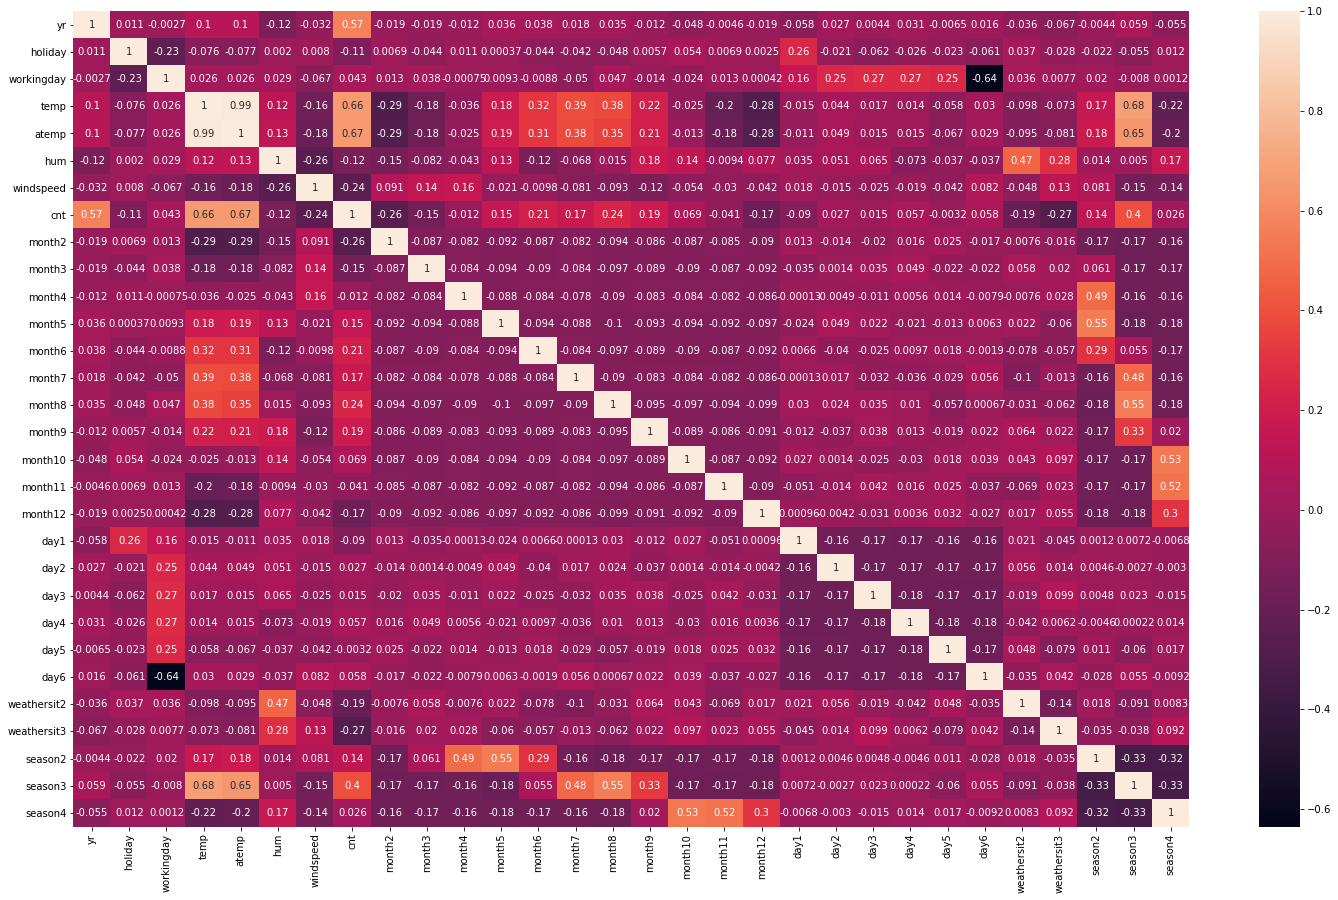

In [23]:
# Finding correlation 
plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(),annot = True)

1. cnt seems to have correlation with year variable and temp. 
2. Weathersit 2(Mist) and humidity show correlation.
3. Summer (season 2) with may (month 5) and Winter (season 4) with oct(month 10) and nov (month 11) show good correlation.

In [24]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month2', False, 9),
 ('month3', False, 4),
 ('month4', False, 3),
 ('month5', True, 1),
 ('month6', False, 2),
 ('month7', False, 7),
 ('month8', True, 1),
 ('month9', True, 1),
 ('month10', True, 1),
 ('month11', False, 10),
 ('month12', False, 11),
 ('day1', False, 8),
 ('day2', False, 15),
 ('day3', False, 12),
 ('day4', False, 14),
 ('day5', False, 13),
 ('day6', False, 5),
 ('weathersit2', True, 1),
 ('weathersit3', True, 1),
 ('season2', True, 1),
 ('season3', True, 1),
 ('season4', True, 1)]

In [27]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'month5',
       'month8', 'month9', 'month10', 'weathersit2', 'weathersit3', 'season2',
       'season3', 'season4'],
      dtype='object')

In [28]:
# Checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'month2', 'month3', 'month4', 'month6', 'month7',
       'month11', 'month12', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6'],
      dtype='object')

In [29]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,atemp,hum,windspeed,month5,month8,month9,month10,weathersit2,weathersit3,season2,season3,season4
706,1,0,0.378139,0.397222,0.937018,0.162836,0,0,0,0,1,0,0,0,1
579,1,0,0.889150,0.881676,0.660668,0.398705,0,1,0,0,1,0,0,1,0
155,0,0,0.732854,0.727540,0.670951,0.239759,0,0,0,0,1,0,1,0,0
538,1,0,0.843703,0.779840,0.549700,0.324343,0,0,0,0,0,0,0,1,0
211,0,0,0.942358,0.891746,0.494430,0.293609,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,0.000000,0.002550,0.505644,0.280244,0,0,0,0,0,0,0,0,0
258,0,0,0.494530,0.501808,0.607113,0.292310,0,0,1,0,1,0,0,1,0
316,0,0,0.456841,0.456866,0.471294,0.534621,0,0,0,0,0,0,0,0,1
467,1,0,0.459058,0.458694,0.419880,0.274350,0,0,0,0,0,0,1,0,0


In [30]:
# Model 1
import statsmodels.api as sm  

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

 # Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()  

# PrintingsSummary of linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.57e-188
Time:                        11:12:57   Log-Likelihood:                 503.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     494   BIC:                            -907.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2724      0.028      9.592      

In [31]:
# Dropping month5 since it has p value 0.163 > 0.05
X_train_new = X_train_rfe.drop(["month5"], axis = 1)

In [32]:
# Model 2
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()  
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.94e-189
Time:                        11:12:57   Log-Likelihood:                 502.75
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     495   BIC:                            -912.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2660      0.028      9.482      

In [33]:
# Drop constant value
X_train_new = X_train_new.drop(['const'], axis=1)

In [34]:
# Importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,322.15
3,atemp,306.36
4,hum,14.27
12,season3,7.36
5,windspeed,4.38
11,season2,3.41
13,season4,2.81
9,weathersit2,2.13
0,yr,2.01
6,month8,1.87


In [35]:
# temp and atemp has high correlation so we can drop atemp which has both high p value and VIF value
X_train_new = X_train_new.drop(['atemp'], axis=1)

In [36]:
# Model 3 
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()  
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.87e-190
Time:                        11:12:58   Log-Likelihood:                 501.10
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2688      0.028      9.576      

In [37]:
# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,19.39
3,hum,13.90
11,season3,7.34
4,windspeed,4.25
10,season2,3.41
12,season4,2.80
8,weathersit2,2.12
0,yr,2.01
5,month8,1.84
7,month10,1.64


After dropping 'atemp', 'temp' p-value is reduced to 0 and VIF value is also reduced.

In [38]:
# Drop month8 since its p>0.05
X_train_new= X_train_new.drop(["month8"], axis = 1)

In [39]:
# Model 4
  
X_train_lm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm).fit()  
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.49e-189
Time:                        11:12:58   Log-Likelihood:                 497.87
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     497   BIC:                            -914.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2645      0.028      9.390      

In [40]:
# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,19.39
3,hum,13.88
10,season3,6.36
4,windspeed,4.24
9,season2,3.41
11,season4,2.79
7,weathersit2,2.12
0,yr,2.01
6,month10,1.64
5,month9,1.29


In [41]:
# Dropping humidity as it high VIF value
X_train_new= X_train_new.drop(["hum"], axis = 1)

In [42]:
# Model 5
 
X_train_lm = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm).fit()  
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.06e-186
Time:                        11:12:58   Log-Likelihood:                 486.91
No. Observations:                 510   AIC:                            -949.8
Df Residuals:                     498   BIC:                            -899.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1594      0.017      9.210      

In [43]:
# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.19
9,season3,6.21
3,windspeed,3.55
8,season2,3.40
10,season4,2.57
0,yr,1.99
5,month10,1.62
6,weathersit2,1.47
4,month9,1.29
7,weathersit3,1.11


In [44]:
# Since season 3 has VIF > 5 ,drop it
X_train_new= X_train_new.drop(["season3"], axis = 1)

In [45]:
# Model 6  
X_train_lm = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm).fit()  
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.30e-183
Time:                        11:12:58   Log-Likelihood:                 476.51
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     499   BIC:                            -884.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1502      0.018      8.573      

In [46]:
# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.87
3,windspeed,3.35
0,yr,1.97
9,season4,1.82
5,month10,1.59
8,season2,1.56
6,weathersit2,1.46
4,month9,1.25
7,weathersit3,1.10
1,holiday,1.03


In [47]:
# Dropping month 10 
X_train_new= X_train_new.drop(["month10"], axis = 1)

# Model 7
X_train_lm = sm.add_constant(X_train_new)
lm_7 = sm.OLS(y_train,X_train_lm).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.65e-182
Time:                        11:12:58   Log-Likelihood:                 472.65
No. Observations:                 510   AIC:                            -925.3
Df Residuals:                     500   BIC:                            -882.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1447      0.018      8.260      

In [48]:
# Checking VIF for multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.80
3,windspeed,3.33
0,yr,1.96
7,season2,1.55
5,weathersit2,1.46
8,season4,1.32
4,month9,1.22
6,weathersit3,1.10
1,holiday,1.03


Model 7 is the final model since
1. p-values are 0 for all features
2. VIF values are also < 5 for all features
3. R-squared value is also good 
4. Prob (F-statistic) < 0.05
5. Difference between R-squared and Adjusted R-squared values for this model is veryless

In [49]:
# Checking the parameters and their coefficient values
lm_7.params

const          0.144746
yr             0.230119
holiday       -0.115166
temp           0.528826
windspeed     -0.118901
month9         0.077017
weathersit2   -0.076758
weathersit3   -0.281035
season2        0.070276
season4        0.124011
dtype: float64

# Model Evaluation

### Residual analysis of train data

In [50]:
y_train_pred = lm_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

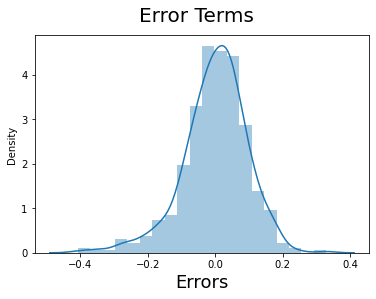

In [51]:
# check if the error terms are also normally distributed by plotting histogram
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)   # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         

Errors are normally distribured here with mean 0.

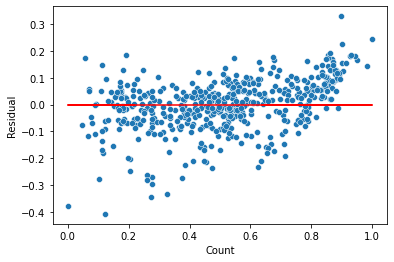

In [52]:
# Checking for Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

# Predicting using the final model

### Applying the scaling on the test sets

In [53]:
# Scaling the numerical data only using transform
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
# Checking the dataframe
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month2,month3,...,day2,day3,day4,day5,day6,weathersit2,weathersit3,season2,season3,season4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.045662,0.634703,0.544886,0.537993,0.641986,0.341663,0.526097,0.068493,0.091324,...,0.146119,0.118721,0.114155,0.136986,0.141553,0.337900,0.013699,0.269406,0.269406,0.255708
std,0.500722,0.209229,0.482616,0.238570,0.234058,0.139188,0.158831,0.208742,0.253169,0.288730,...,0.354034,0.324202,0.318728,0.344621,0.349389,0.474078,0.116503,0.444668,0.444668,0.437258
min,0.000000,0.000000,0.000000,-0.050894,-0.053923,0.283633,0.047441,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351583,0.354899,0.536419,0.228871,0.389439,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.552171,0.549511,0.648671,0.321782,0.523815,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746710,0.718818,0.735004,0.427798,0.673090,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.016627,1.053202,0.955442,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
# use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [57]:
# Making predictions
y_pred = lm_7.predict(X_test_new)

In [58]:
# Calculating R squared value for test data

from sklearn.metrics import r2_score

r2=r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

0.8037455383168342


Text(0, 0.5, 'y_pred')

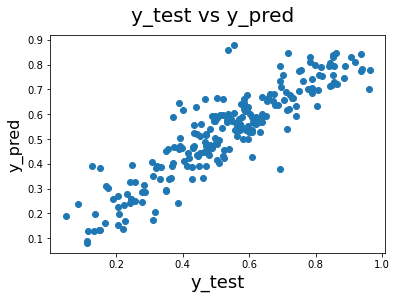

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [60]:
round(lm_7.params,4)

const          0.1447
yr             0.2301
holiday       -0.1152
temp           0.5288
windspeed     -0.1189
month9         0.0770
weathersit2   -0.0768
weathersit3   -0.2810
season2        0.0703
season4        0.1240
dtype: float64

cnt = 0.1447 + 0.5288 X temp + 0.2301 X yr - 0.1152 X holiday - 0.1189 X windspeed + 0.0770 X month9 - 0.0768 X weathersit2 - 0.2810 X weathersit3 + 0.0703 X season2 + 0.1240 X season4 

Training R2 - 0.824
Test R2 - 0.803

Training adj R2 - 0.821

Overall both Train and Test R squared values are more than 80%, the model is significant.

# Insights

1. All the positive coefficients like temp, season4(Winter) indicate that an increase in these values will lead to an increase in the value of cnt.
2. All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
3. Temp is the most significant with the largest coefficient.
4. Bike rentals is more for the month of september(month9)
5. The rentals reduce during holidays

This indicates that the bike rentals is majorly affected by temperature, season and month.

## Final Report

As per our final Model, the top 3 predictor variables that are important for increasing bike booking are:

Temperature (Positive correlation)    
Heavy Rain (Weathersit3) (Negative correlation)   
Year (Positive correlation)